In [157]:
import torch
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn

In [158]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [159]:
n_samples = 500
# Creating moons
X, y  = make_moons(n_samples,
                   noise = .03,
                   random_state=42
)
# The X is generated shapes
# y is the integer labels 0, or 1 for class memembership of each sample
len(X), len(y)

(500, 500)

In [160]:
print(X[:5])

[[ 0.83054947 -0.46285128]
 [ 0.6630073   0.80864094]
 [ 1.01072467 -0.49553465]
 [-0.34021326  0.94281044]
 [ 0.2782442   1.02100609]]


In [161]:
print(y[:5])

[1 0 1 0 0]


In [162]:
moons = pd.DataFrame({"X1": X[:, 0],
                     "X2": X[:, 1],
                     "Label": y})
moons.head(10)

,X1,X2,Label
0,0.830549,-0.462851,1
1,0.663007,0.808641,0
2,1.010725,-0.495535,1
3,-0.340213,0.942810,0
4,0.278244,1.021006,0
5,1.250363,-0.478016,1
6,1.044926,-0.465415,1
7,0.021351,1.031799,0
8,0.633924,0.730458,0
9,1.798557,-0.117611,1


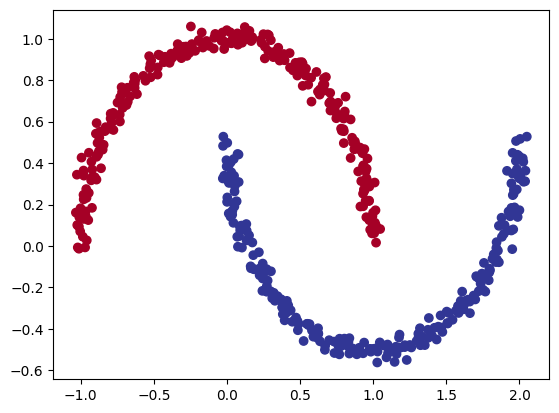

In [163]:
# Plotting | Visualizing
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [164]:
X_shape = X[0]
y_shape = y[0]
print(f"The first value of X is: {X_shape}")
print(f"The first value of y is: {y_shape}")
print(f"X is shaped as {X.shape}, two dim, for two values of X.")
print(f"y is shaped as {y.shape}. So y is a scalar.")

The first value of X is: [ 0.83054947 -0.46285128]
The first value of y is: 1
X is shaped as (500, 2), two dim, for two values of X.
y is shaped as (500,). So y is a scalar.


In [165]:
# Converting make_moons data into tensors
X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)
print(f"First 3 values of X as a tensor:\n {X_tensor[:3]}")
print(f"First 3 values of y as a tensor {y_tensor[:3]}")

First 3 values of X as a tensor:
 tensor([[ 0.8305, -0.4629],
        [ 0.6630,  0.8086],
        [ 1.0107, -0.4955]])
First 3 values of y as a tensor tensor([1., 0., 1.])


In [166]:
print(f"Size of X_tensor {X_tensor.size()}, dim of {X_tensor.ndim}")
print(f"Size of y_tensor {y_tensor.size()}, dim of {y_tensor.ndim}")

Size of X_tensor torch.Size([500, 2]), dim of 2
Size of y_tensor torch.Size([500]), dim of 1


# Splitting the training will be done using sklearn splitting 80% training, 20% testing

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=42)
print(f"X Training: {len(X_train)}, X Testing: {len(X_test)}")
print(f"y Training: {len(y_train)}, y Testing: {len(y_test)}")

X Training: 400, X Testing: 100
y Training: 400, y Testing: 100


In [168]:
type(X_train)
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)
X_tensor[:1]

tensor([[ 0.8305, -0.4629]])

In [169]:
# Agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [170]:
# Creating model
in_feature = 2
hidden_feature = 10
out_feature = 1

class moonModelv0(nn.Module):
  def __init__(self):

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=in_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=out_feature)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [171]:
model = moonModelv0().to(device)
model

moonModelv0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [172]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters(),
                            lr = .15)


In [173]:
# Evaluating model pretraining
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)
y_logits[:10], y_test[:10]

(tensor([[0.0205],
         [0.0188],
         [0.0186],
         [0.0118],
         [0.0323],
         [0.0181],
         [0.0164],
         [0.0088],
         [0.0076],
         [0.0077]]),
 tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.]))

In [174]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:10].squeeze(), y_test

(tensor([0.5051, 0.5047, 0.5047, 0.5030, 0.5081, 0.5045, 0.5041, 0.5022, 0.5019,
         0.5019]),
 tensor([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
         1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]))

In [175]:
y_logits.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([400]))

In [176]:
# Write evaluation loop
torch.manual_seed(42)
epochs = 101

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits.squeeze(), y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds.squeeze())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # Testing

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits.squeeze(), y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds.squeeze())

    # printing epochs
    if epoch % 5 == 0 or epoch == 100:
      print(f"Epoch: {epoch} | Loss: {loss:.3f} | Acc: {acc:.4f}% | Test Loss: {test_loss:.3f} | Test acc: {test_acc:.4f}%")


Epoch: 0 | Loss: 0.696 | Acc: 35.2500% | Test Loss: 0.693 | Test acc: 57.0000%
Epoch: 5 | Loss: 0.686 | Acc: 75.2500% | Test Loss: 0.683 | Test acc: 79.0000%
Epoch: 10 | Loss: 0.677 | Acc: 75.5000% | Test Loss: 0.673 | Test acc: 77.0000%
Epoch: 15 | Loss: 0.666 | Acc: 73.0000% | Test Loss: 0.662 | Test acc: 76.0000%
Epoch: 20 | Loss: 0.654 | Acc: 72.0000% | Test Loss: 0.649 | Test acc: 75.0000%
Epoch: 25 | Loss: 0.638 | Acc: 72.0000% | Test Loss: 0.632 | Test acc: 75.0000%
Epoch: 30 | Loss: 0.618 | Acc: 72.7500% | Test Loss: 0.611 | Test acc: 75.0000%
Epoch: 35 | Loss: 0.593 | Acc: 73.5000% | Test Loss: 0.584 | Test acc: 75.0000%
Epoch: 40 | Loss: 0.563 | Acc: 74.2500% | Test Loss: 0.553 | Test acc: 76.0000%
Epoch: 45 | Loss: 0.530 | Acc: 75.7500% | Test Loss: 0.521 | Test acc: 76.0000%
Epoch: 50 | Loss: 0.496 | Acc: 77.0000% | Test Loss: 0.488 | Test acc: 76.0000%
Epoch: 55 | Loss: 0.462 | Acc: 78.7500% | Test Loss: 0.456 | Test acc: 77.0000%
Epoch: 60 | Loss: 0.431 | Acc: 79.5000% | 

## I will add more hidden layers, and another relu function to try and lower test loss and increase test accuracry.
* +2 more linear layers
* +2 more ReLU layers
* Hidden_featues : 10 --> 12
* lr : .15 --> .20

I will be doing each of these and expirmenting to see which will give be the best model. This fine tuning will allow me to better understand how best I should tackle this type of binary classification

In [177]:
# Changing model
# Updated learning rate from .15 --> .20
in_feature = 2
hidden_feature = 12
out_feature = 1

class moonModelv1(nn.Module):
  def __init__(self):

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=in_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=out_feature)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_1 = moonModelv1()
model_1

moonModelv1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
  )
)

In [178]:
# New loss and new optimzer
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

# When updating model (lr) make sure to change the correct model on the optimizer

optimizer_v1 = torch.optim.SGD(model_1.parameters(),
                            lr = .20)

In [179]:
# Write evaluation loop for model 1
# lr from .15 --> .20
torch.manual_seed(42)
epochs = 101

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train)
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits.squeeze(), y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds.squeeze())

  optimizer_v1.zero_grad()
  loss.backward()
  optimizer_v1.step()

  # Testing

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test)
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits.squeeze(), y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds.squeeze())

    # printing epochs
    if epoch % 5 == 0 or epoch == 100:
      print(f"Epoch: {epoch} | Loss: {loss:.3f} | Acc: {acc:.4f}% | Test Loss: {test_loss:.3f} | Test acc: {test_acc:.4f}%")

Epoch: 0 | Loss: 0.685 | Acc: 48.2500% | Test Loss: 0.668 | Test acc: 57.0000%
Epoch: 5 | Loss: 0.668 | Acc: 62.5000% | Test Loss: 0.652 | Test acc: 70.0000%
Epoch: 10 | Loss: 0.648 | Acc: 71.5000% | Test Loss: 0.630 | Test acc: 78.0000%
Epoch: 15 | Loss: 0.626 | Acc: 73.2500% | Test Loss: 0.605 | Test acc: 75.0000%
Epoch: 20 | Loss: 0.602 | Acc: 71.5000% | Test Loss: 0.576 | Test acc: 77.0000%
Epoch: 25 | Loss: 0.577 | Acc: 73.7500% | Test Loss: 0.547 | Test acc: 79.0000%
Epoch: 30 | Loss: 0.551 | Acc: 74.5000% | Test Loss: 0.519 | Test acc: 77.0000%
Epoch: 35 | Loss: 0.527 | Acc: 75.7500% | Test Loss: 0.493 | Test acc: 78.0000%
Epoch: 40 | Loss: 0.504 | Acc: 77.0000% | Test Loss: 0.471 | Test acc: 78.0000%
Epoch: 45 | Loss: 0.484 | Acc: 77.7500% | Test Loss: 0.451 | Test acc: 80.0000%
Epoch: 50 | Loss: 0.465 | Acc: 78.7500% | Test Loss: 0.434 | Test acc: 82.0000%
Epoch: 55 | Loss: 0.447 | Acc: 79.5000% | Test Loss: 0.419 | Test acc: 83.0000%
Epoch: 60 | Loss: 0.430 | Acc: 81.0000% | 

# Chaning the lr from .15 -> .20 & changing the hidden features from 10 --> 12
- moonModelV1 did improve by %1.

## MoonModelv2 will improve upon moonmodelv1 where the number of epochs will go from 100 --> 1000. And adding two linear layers and two more ReLU layers().

In [180]:
# Improving on modelv1
# Adding two more linear layers and adding two more reLu
# Changing number of epochs to 100 --> 1000
in_feature = 2
hidden_feature = 12
out_feature = 1

class moonModelv2(nn.Module):
  def __init__(self):

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=in_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=hidden_feature),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feature, out_features=out_feature)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_2 = moonModelv2()
model_2

moonModelv2(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=12, bias=True)
    (7): ReLU()
    (8): Linear(in_features=12, out_features=1, bias=True)
  )
)

In [181]:
# New loss and new optimzer
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

# When updating model (lr) make sure to change the correct model on the optimizer

optimizer_v2 = torch.optim.SGD(model_2.parameters(),
                            lr = .20)

In [182]:
# Write evaluation loop for model 1
# Adding two more linear layers and adding two more reLu
# Changing number of epochs to 100 --> 1000

torch.manual_seed(42)
epochs = 1001

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train)
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits.squeeze(), y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds.squeeze())

  optimizer_v2.zero_grad()
  loss.backward()
  optimizer_v2.step()

  # Testing

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test)
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits.squeeze(), y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds.squeeze())

    # printing epochs
    if epoch % 100 == 0 or epoch == 1000:
      print(f"Epoch: {epoch} | Loss: {loss:.3f} | Acc: {acc:.4f}% | Test Loss: {test_loss:.3f} | Test acc: {test_acc:.4f}%")

Epoch: 0 | Loss: 0.700 | Acc: 48.2500% | Test Loss: 0.685 | Test acc: 57.0000%
Epoch: 100 | Loss: 0.488 | Acc: 80.5000% | Test Loss: 0.475 | Test acc: 80.0000%
Epoch: 200 | Loss: 0.144 | Acc: 94.0000% | Test Loss: 0.152 | Test acc: 93.0000%
Epoch: 300 | Loss: 0.009 | Acc: 100.0000% | Test Loss: 0.010 | Test acc: 100.0000%
Epoch: 400 | Loss: 0.002 | Acc: 100.0000% | Test Loss: 0.003 | Test acc: 100.0000%
Epoch: 500 | Loss: 0.001 | Acc: 100.0000% | Test Loss: 0.001 | Test acc: 100.0000%
Epoch: 600 | Loss: 0.001 | Acc: 100.0000% | Test Loss: 0.001 | Test acc: 100.0000%
Epoch: 700 | Loss: 0.001 | Acc: 100.0000% | Test Loss: 0.001 | Test acc: 100.0000%
Epoch: 800 | Loss: 0.000 | Acc: 100.0000% | Test Loss: 0.001 | Test acc: 100.0000%
Epoch: 900 | Loss: 0.000 | Acc: 100.0000% | Test Loss: 0.000 | Test acc: 100.0000%
Epoch: 1000 | Loss: 0.000 | Acc: 100.0000% | Test Loss: 0.000 | Test acc: 100.0000%


In [183]:
# importing function to print out plots
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

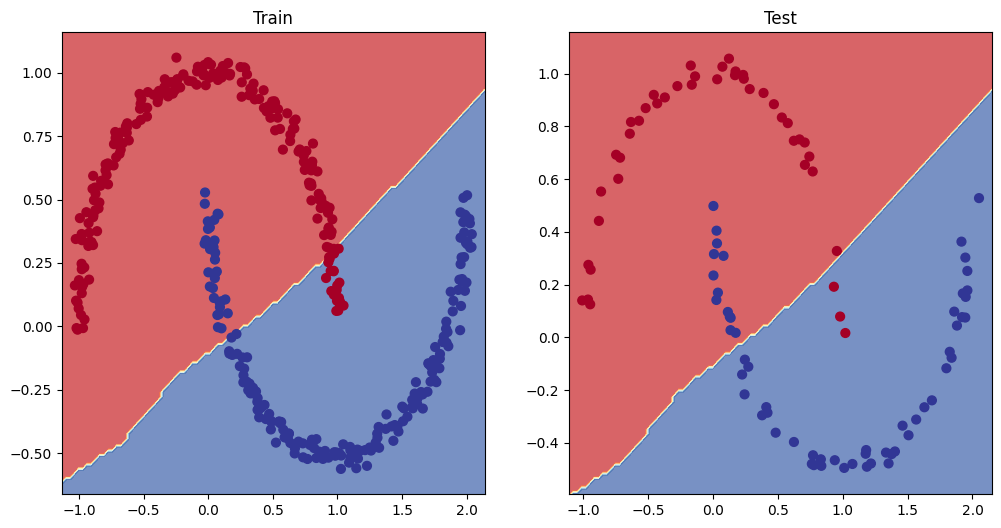

In [187]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train: Model 0")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test: Model 0")
plot_decision_boundary(model, X_test, y_test)

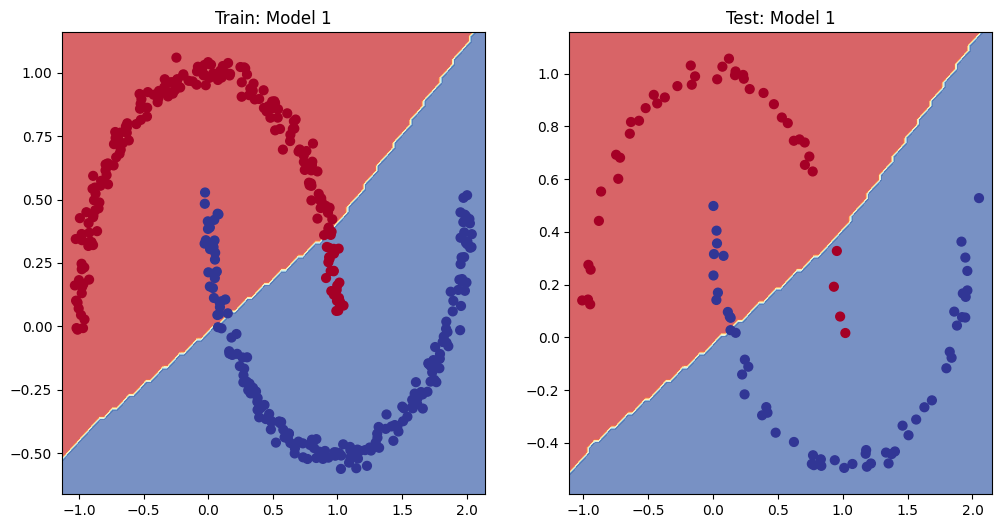

In [188]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train: Model 1")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test: Model 1")
plot_decision_boundary(model_1, X_test, y_test)

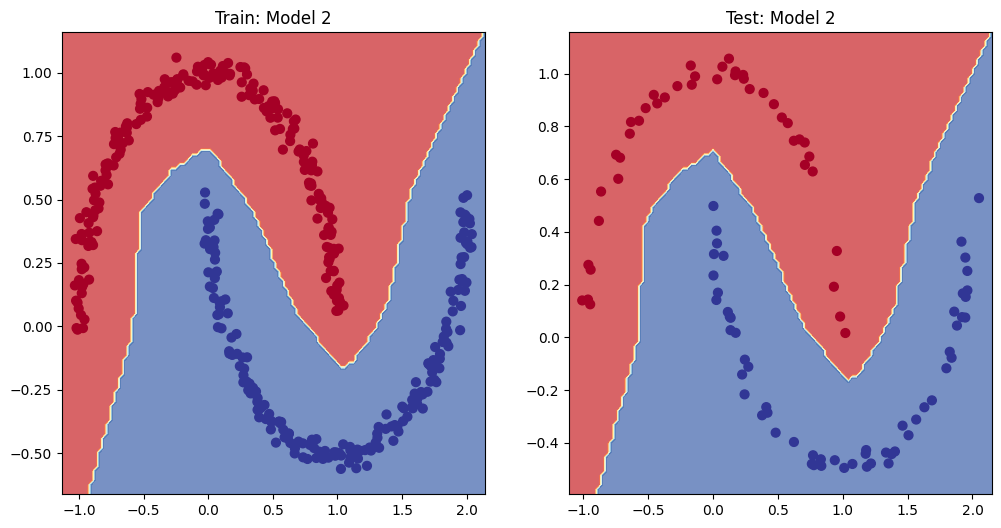

In [189]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train: Model 2")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test: Model 2")
plot_decision_boundary(model_2, X_test, y_test)

# Visuals show how the changes in the model and how hidden layers and different layers affect the model.